In [84]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [85]:
signal = np.load('signal.npy')
id = 1
sig = signal[:,id] - np.mean(signal[:,id])
sig_fft = abs(cv2.dft(sig))**2
print(np.argmax(sig_fft))
id_freq = np.argmax(sig_fft)
heart_beat= id_freq*5.5/sig_fft.shape[0] # the factor 8 is the approximate stop band of the butterworth filter maybe, not sure
print(heart_beat)


17
0.044270833333333336


In [26]:
dft = cv2.dft(signal[:,0] - np.mean(signal[:,0]))
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift))

TypeError: magnitude() missing required argument 'y' (pos 2)

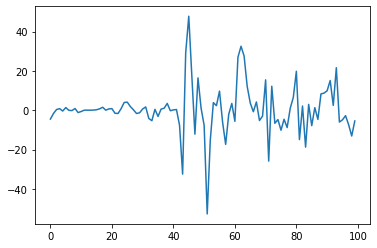

In [4]:
plt.plot(sig[0:100])

In [16]:
print(sig_fft.shape)

(1348, 1)


2.0178041543026706


[6.90928157e-12 6.35386515e-09 2.04037339e-07 ... 1.16825553e-19
 1.53843548e-20 4.80766203e-22] [0.00000000e+00 1.57079633e-03 3.14159265e-03 ... 3.13688026e+00
 3.13845106e+00 3.14002186e+00]


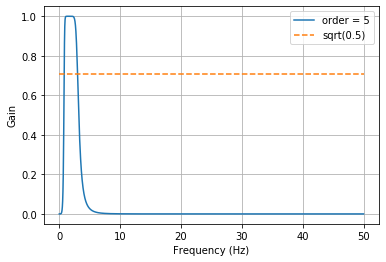

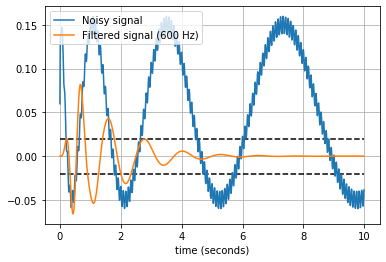

In [230]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 100
    lowcut = 0.8
    highcut = 3

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [5]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        print(abs(h),w)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 10
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=5)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [218]:
signal = np.load('signal.npy')
id = 1
fps_cam = 2
val = -100
max_periodicity = 0
for k in range(5):
    id = k
    sig = signal[:,id] - np.mean(signal[:,id])
    sig_fft = abs(cv2.dft(sig))**2
    max_val = -100
    for i in range(sig_fft.shape[0]):
        if(2 * i < sig_fft.shape[0]):
            if(sig_fft[i] + sig_fft[2*i] > max_val):
                max_val = sig_fft[i] + sig_fft[2*i]
                id_freq = i

    periodicity = (sig_fft[id_freq] + sig_fft[2*id_freq])/sum(sig_fft)
    if(periodicity > max_periodicity):
        max_periodicity = periodicity
        id_final = id_freq
    print(periodicity)
# print(sig_fft[id_freq] / sum(sig_fft))
# if(sig_fft[id_freq] / sum(sig_fft) > val):
#     val = sig_fft[id_freq] / sum(sig_fft)
#     id_max = id_freq
# # the factor 8 is the approximate stop band of the butterworth filter maybe, not sure
# print(sig_fft.shape[0])
heart_beat= id_final*5.5/sig_fft.shape[0]
print(id_final)
print("heart beat: ",60*heart_beat, "bpm")

[0.02267422]
[0.02418001]
[0.02402775]
[0.0307771]
[0.01705648]
327
heart beat:  38.663561447509856 bpm


[63614.433223]
2810.4650016136356
(2112, 1)
[[  62]
 [  29]
 [  33]
 ...
 [1150]
 [1408]
 [1578]]


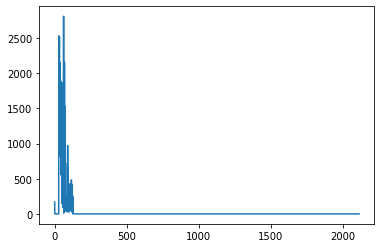

In [123]:
sig = signal[:,0] 
sig_fft = abs(cv2.dft(sig))
plt.plot(sig_fft[0:100])
print(sum(sig_fft))
print(np.max(sig_fft))
print(sig_fft.shape)
print(np.argsort(-sig_fft,axis=0))

In [121]:
signal = np.load('signal.npy')

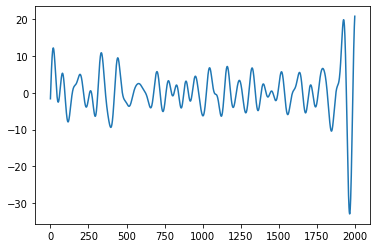

In [119]:
plt.plot(signal[0:2000,0])

In [117]:
signal.shape

(2112, 77)